In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from helpers_optimization import *
from helpers_data import *
from helpers_visualization import *
import os
%load_ext autoreload
%autoreload 2

In [3]:
DATA_TRAIN_PATH = os.path.dirname(os.getcwd()) + '/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH) # labels/predictions, id of each sample, tX - 30 features of each sample (float)
labels_feature = np.genfromtxt(DATA_TRAIN_PATH, delimiter=",", dtype=str, max_rows=1)[2:]

In [4]:
# Splitting the dataset based on the value of PRI_jet_num and 
# removing undefined features for the corresponding subsets
ss0_tX, ss0_y, ss1_tX, ss1_y, ss2_tX, ss2_y, ss3_tX, ss3_y, labels_feat = split_subsets(tX, y,labels_feature)

Subset 0 contains 99913 samples 
Subset 1 contains 77544 samples 
Subset 2 contains 50379 samples 
Subset 3 contains 22164 samples 
Remaining features for subset 2, 3: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_leading_pt'
 'PRI_jet_leading_eta' 'PRI_jet_leading_phi' 'PRI_jet_subleading_pt'
 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi' 'PRI_jet_all_pt']
Remaining features for subset 1: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'PRI_tau_pt' 'PRI_tau_eta' 'PRI_tau_phi'
 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi' 'PRI_

In [5]:
ss_y = ss2_y
ss_tX = ss2_tX

Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


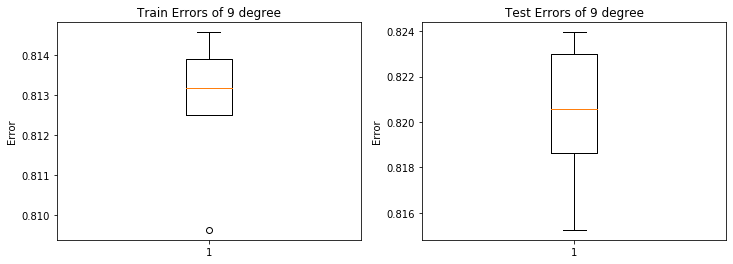

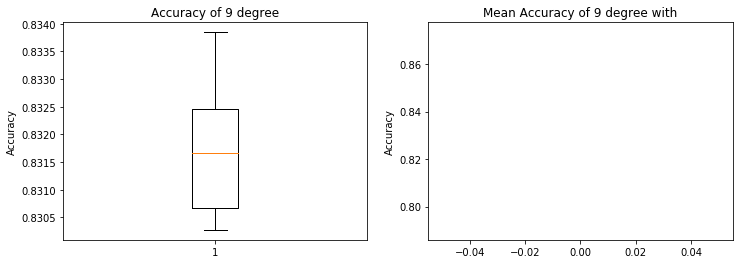

[0.83178164]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


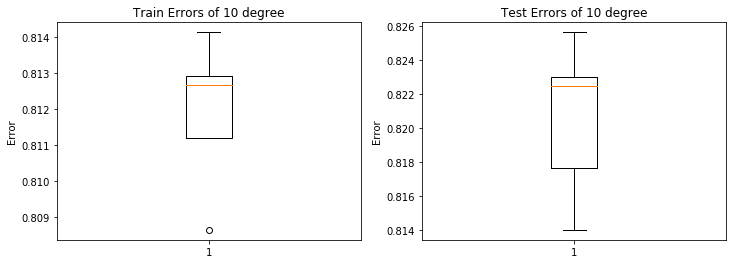

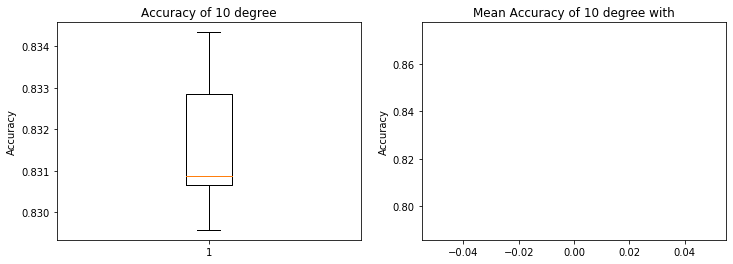

[0.83166253]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


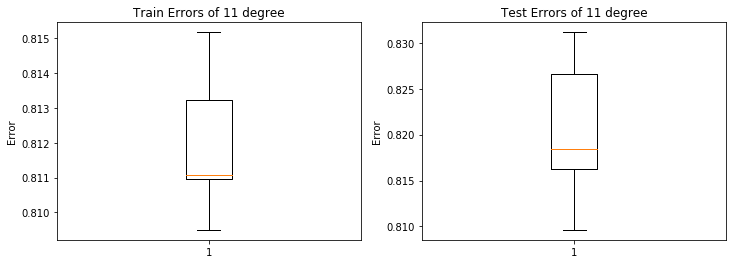

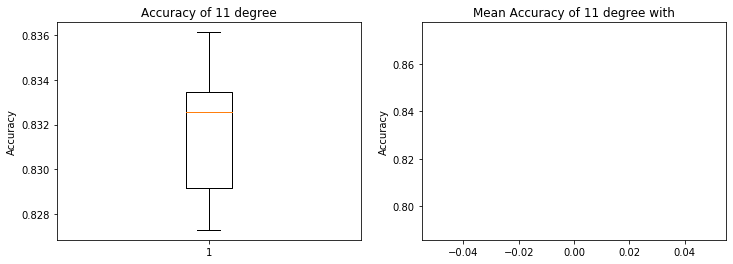

[0.83172208]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


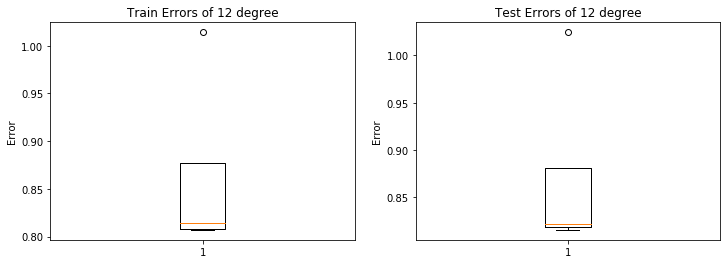

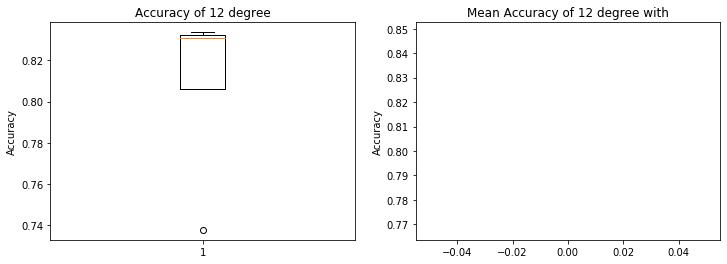

[0.80813896]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


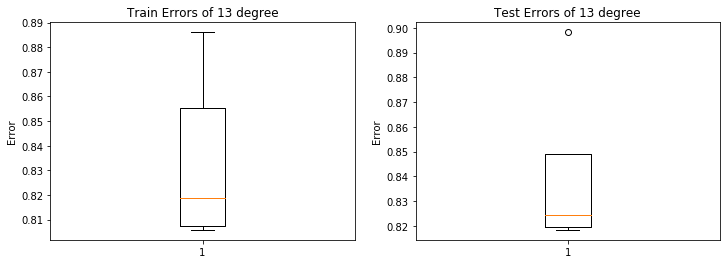

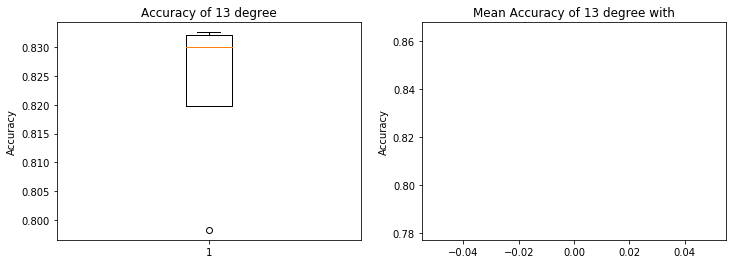

[0.82257072]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


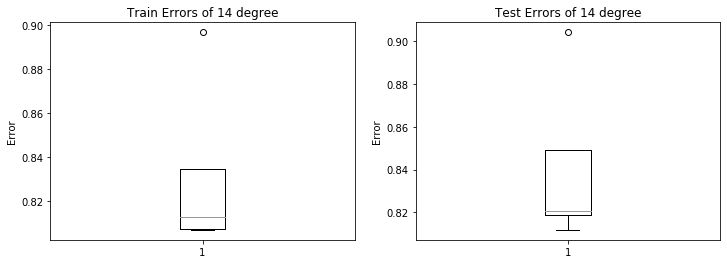

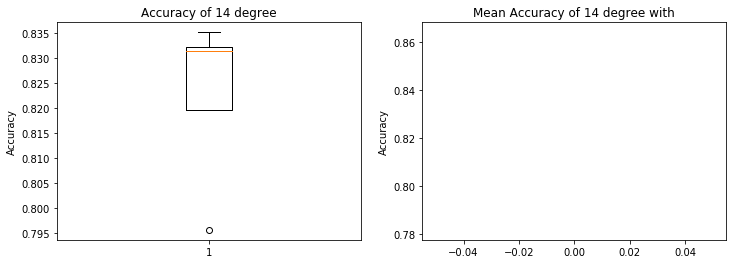

[0.82288834]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %


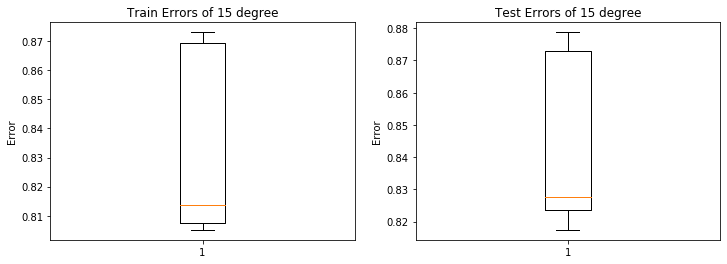

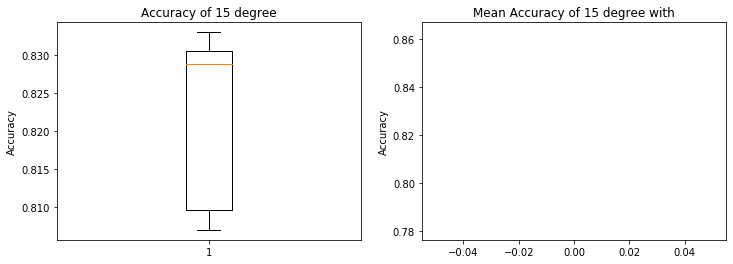

[0.82173697]


In [6]:
# RMSE - With Outliers

lambdas = []
degrees = np.linspace(9,15,7, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'ls', feature_augmentation=False,  hyperparams=[lambdas, False])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)
    print(np.mean(acc_tmp,axis=1))
    
    

Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


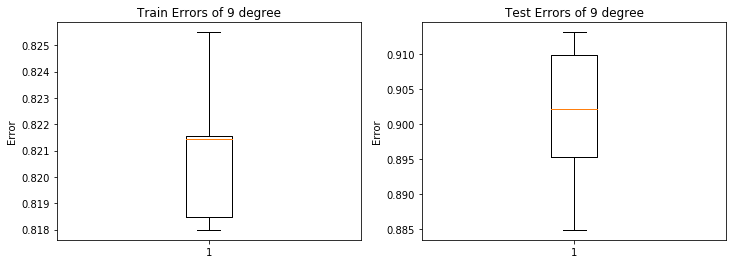

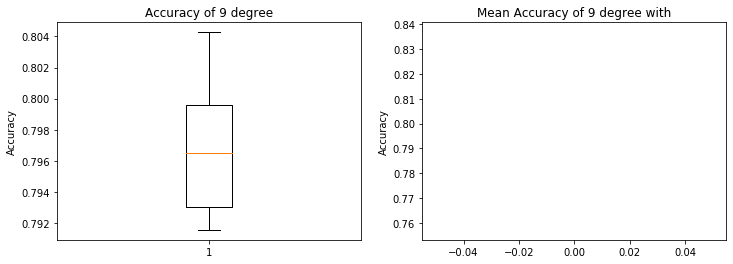

[0.79700248]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


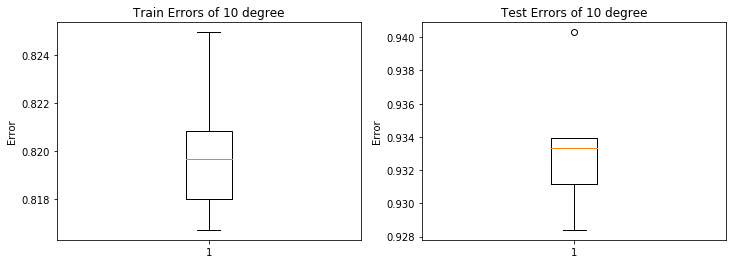

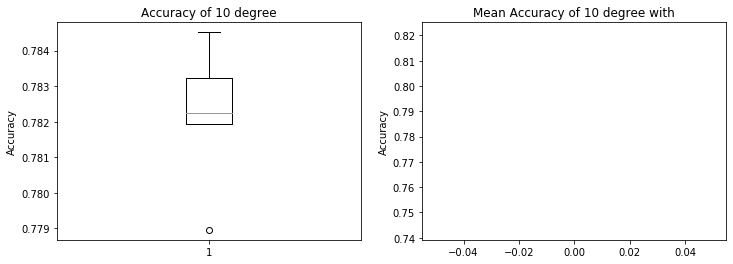

[0.7821737]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


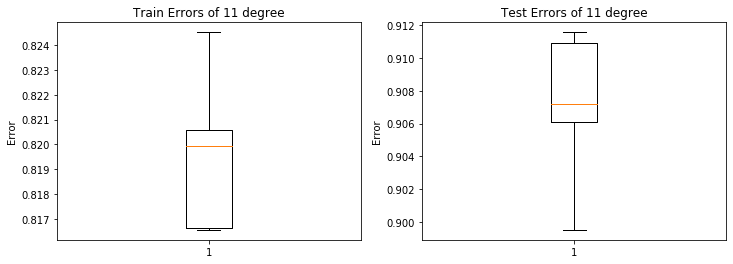

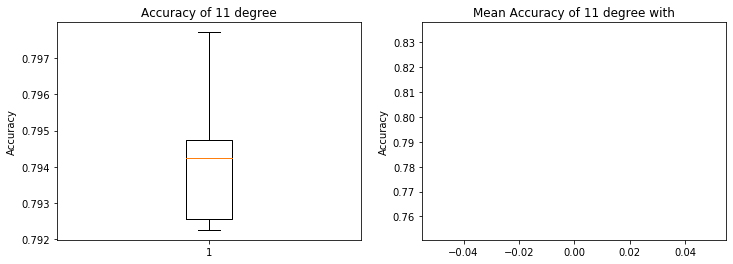

[0.79430273]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


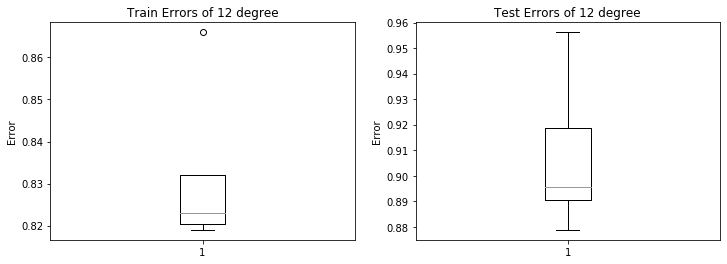

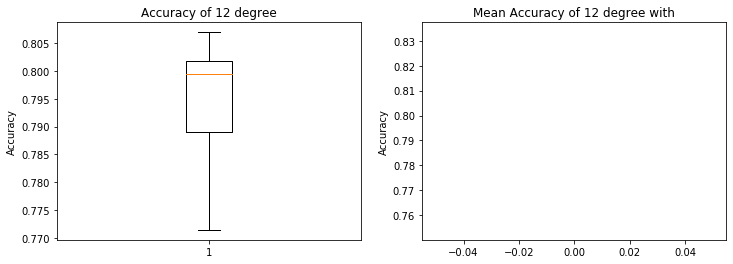

[0.7937469]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


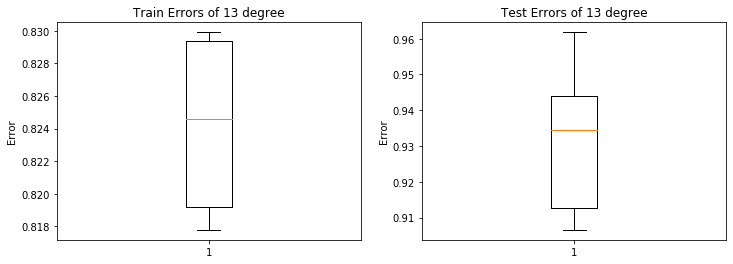

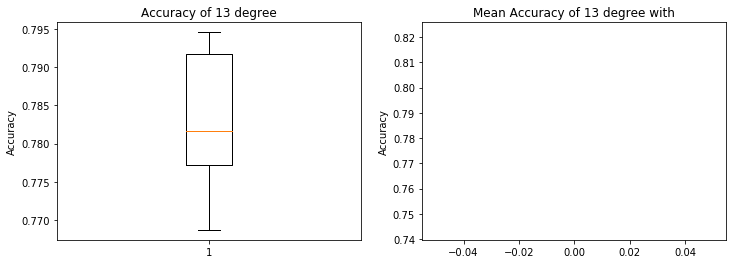

[0.78278908]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


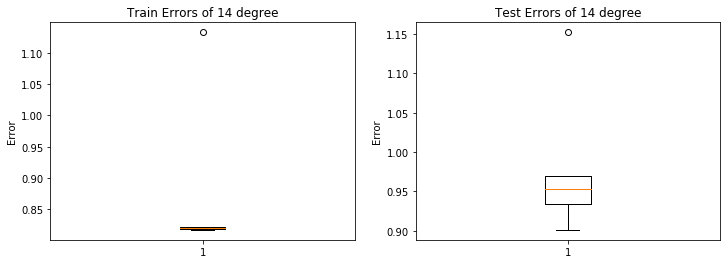

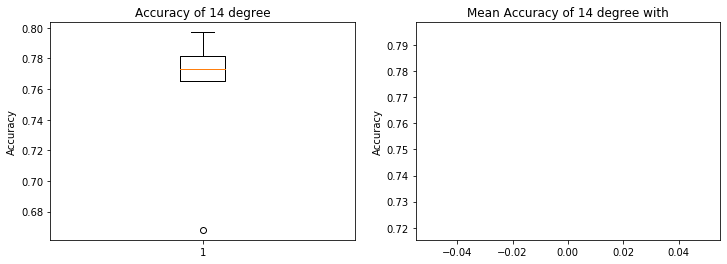

[0.75702233]
Number of remaining samples before start cross val : 50379
Proportion of Bosons in all train set : 51.080807479306856 %
Proportion of Bosons in test fold 1: 51.265508684863526 %
size of the dataset with (40300, 29) and without (34399, 29) the outliers
Number of sample suppressed oustide 3 std: 5901
size of the dataset with (40300, 29) and without (34482, 29) the outliers
Number of sample suppressed oustide 3 std: 5818
size of the dataset with (40300, 29) and without (34436, 29) the outliers
Number of sample suppressed oustide 3 std: 5864
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838
size of the dataset with (40300, 29) and without (34462, 29) the outliers
Number of sample suppressed oustide 3 std: 5838


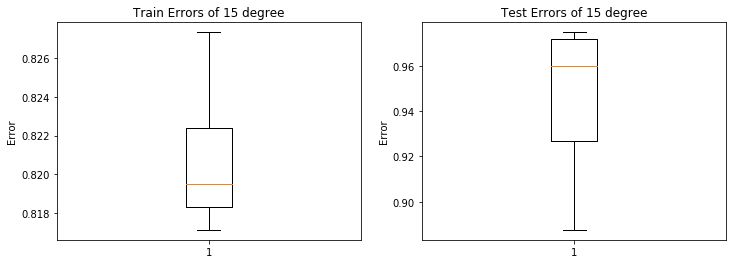

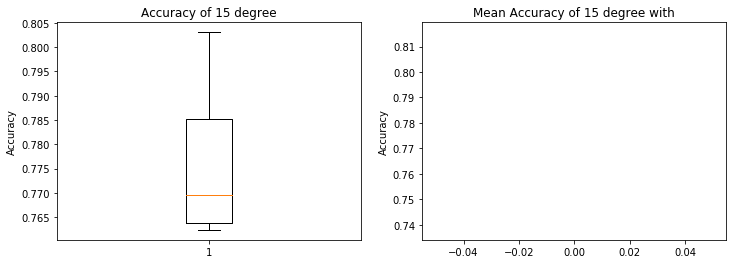

[0.77679404]


In [9]:
# RMSE - Without Outliers

lambdas = []
degrees = np.linspace(9,15,7, dtype=int)

loss_tr = []
loss_te = []  
w = []
accuracy = []

for deg in (degrees):
    loss_tr_tmp, loss_te_tmp, w_tmp, acc_tmp = cross_validation_demo(ss_y, ss_tX, deg, seed = 5, k_fold = 5, class_distribution = False, error = 'rmse', method = 'ls', feature_augmentation=False,  hyperparams=[lambdas, True])
    loss_tr.append(loss_tr_tmp)
    loss_te.append(loss_te_tmp)
    w.append(w_tmp)
    accuracy.append(acc_tmp)
    result_crossval(loss_tr_tmp,loss_te_tmp,deg)
    result_crossval_accuracy(acc_tmp,deg)
    print(np.mean(acc_tmp,axis=1))
    
    